In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi

In [9]:
from qutip import *
from qutip.control import *
from qutip.qip.operations import rx

In [38]:
T = 30e-6
times = np.linspace(0, T, 30)

In [21]:
theta = np.random.rand()
U = rx(theta); U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.99948554+0.j         0.        -0.03207266j]
 [0.        -0.03207266j 0.99948554+0.j        ]]

In [ ]:
R = 200
H_ops = [sigmax(), sigmay()]

H_labels = [r'$u_{x}$',
            r'$u_{y}$',
        ]

In [30]:
H0 = 0 * pi * sigmaz()

In [31]:
from qutip.control.grape import plot_grape_control_fields, _overlap
from qutip.control.cy_grape import cy_overlap
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive

In [32]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar


In [58]:
u0 = np.array([np.random.rand(len(times)) * 2 * pi * 25e3 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

In [64]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:   4.22s. Est. time left: 00:00:00:38
20.0%. Run time:   8.35s. Est. time left: 00:00:00:33
30.0%. Run time:  12.47s. Est. time left: 00:00:00:29
40.0%. Run time:  16.59s. Est. time left: 00:00:00:24
50.0%. Run time:  20.71s. Est. time left: 00:00:00:20
60.0%. Run time:  24.98s. Est. time left: 00:00:00:16
70.0%. Run time:  29.26s. Est. time left: 00:00:00:12
80.0%. Run time:  33.51s. Est. time left: 00:00:00:08
90.0%. Run time:  37.75s. Est. time left: 00:00:00:04
Total run time:  41.88s


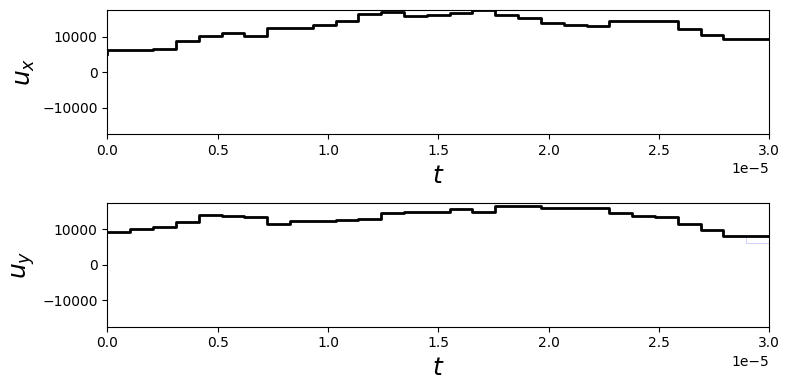

In [65]:
plot_grape_control_fields(times, result.u[:,:,:] / (2 * pi), H_labels, uniform_axes=True);

In [66]:
# unitary from grape pulse
result.U_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.95267267+0.03265569j  0.28912896+0.08805014j]
 [-0.28912896+0.08805014j -0.95267267-0.03265569j]]

In [67]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f))**2


(-0.955006563826557, 0.9120375369518078)